https://blog.paperspace.com/music-genre-classification-using-librosa-and-pytorch/

Aunque dice pytorch utiliza KERAS.<br>
Trata de clasificar el genero musical ('rock', 'jazz',...) de unos audios.<br>
No realizo el ejercicio.Pero me parece una buena guía guia para el apartado uno del proyecto.<br>
**Para que funcione hay que descargar el dataset según las instrucciones del blog**<br>

Utilizo el audio _assets/speech.wav utilizado en el notebook anterior para ver las caracterisitcas de los audios.

TO DO's : <br>
- [x] Probar 'Task List' con lenguaje MD(mark down)
- [ ] Calculating features for the full Dataset
- [ ] Tomar la red neuronal como base para la primera parte del proyecto.


In [1]:
import os
import numpy
from tensorflow import keras
import librosa
from matplotlib import pyplot

## Inspeccionando caracteristicas

In this tutorial, we'll construct four features that we will be used to create a single feature vector related to each file that our model will be trained on.

These features are:

- Mel frequency Cepstral coefficiens
- Mel spectogram
- Chroma vector
 -Tonal Centroid Features

### Mel Frequency Cepstral Coefficients (MFCC)

In [7]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, )
  mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

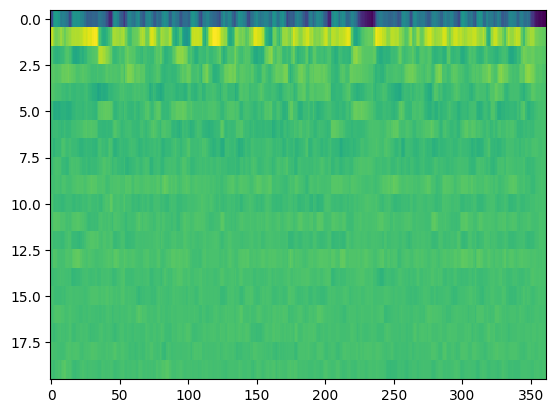

In [8]:
example_file = "./_assets/speech.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [6]:
print(type(mfcc))
print(mfcc.shape)
mfcc[0]

<class 'numpy.ndarray'>
(20, 362)


array([-518.144  , -391.2655 , -199.10013, -132.8303 , -124.83646,
       -128.0958 , -153.0165 , -224.76009, -243.57477, -222.40167,
       -234.1595 , -245.68784, -268.689  , -317.41058, -401.8401 ,
       -311.90726, -199.99094, -156.72725, -157.75941, -170.88832,
       -160.15717, -162.60193, -207.91039, -219.89273, -223.45485,
       -277.46957, -325.70822, -339.79794, -327.9719 , -334.9342 ,
       -335.35037, -314.66794, -310.77542, -323.58325, -316.4915 ,
       -264.88605, -261.63412, -273.817  , -282.1859 , -300.40695,
       -331.20996, -386.36267, -448.7101 , -494.666  , -497.2529 ,
       -370.10358, -226.43817, -181.59494, -188.91553, -221.10452,
       -301.3032 , -332.41177, -353.61423, -407.3792 , -459.38815,
       -358.5357 , -260.8215 , -213.8123 , -211.88371, -237.39026,
       -258.9105 , -282.38403, -244.75937, -203.78442, -172.21194,
       -212.96178, -302.20312, -330.45346, -355.7542 , -255.31354,
       -212.88092, -210.49907, -193.55344, -208.38359, -261.46

### Mel Spectrogram

In [11]:
def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0)
  melspectrogram = numpy.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

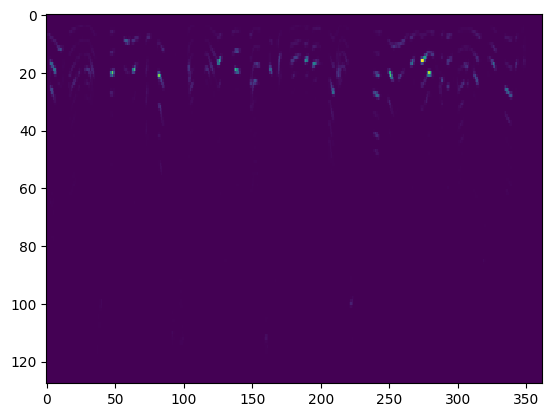

In [12]:
melspectrogram = get_melspectrogram(example_file)
pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
pyplot.show()

In [17]:
print(type(melspectrogram))
print(melspectrogram.shape)
melspectrogram[0]

<class 'numpy.ndarray'>
(128, 362)


array([2.97124516e-05, 5.85087728e-05, 2.21475002e-05, 2.07444664e-05,
       1.00653524e-04, 1.82118485e-04, 1.09107816e-04, 5.51412631e-05,
       5.08084777e-05, 9.82054917e-05, 6.26322944e-05, 7.38908566e-05,
       1.11686903e-04, 3.59341939e-05, 1.80245797e-06, 8.06561002e-06,
       1.57683407e-05, 3.12173943e-05, 6.97547584e-05, 1.05142579e-04,
       2.45319941e-04, 7.19329037e-05, 2.70508845e-05, 2.67994237e-05,
       7.85119846e-05, 1.58258423e-04, 7.16463474e-05, 3.29728027e-05,
       4.95014719e-05, 5.09766905e-05, 6.18347185e-05, 6.37075645e-05,
       4.11393048e-05, 1.28374668e-05, 1.59840711e-05, 2.31295271e-05,
       5.83001165e-05, 1.22782367e-04, 3.43729844e-05, 1.03738830e-05,
       7.57630914e-06, 3.47637956e-06, 2.12068380e-06, 1.10884810e-06,
       6.52175402e-07, 3.35588243e-06, 2.06143814e-04, 9.04479180e-04,
       9.91397654e-04, 4.58773080e-04, 3.82116050e-05, 9.61891510e-06,
       1.17957670e-05, 5.45394778e-06, 3.15082957e-06, 1.15819412e-05,
      

### Chroma Vector

In [14]:
def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = numpy.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

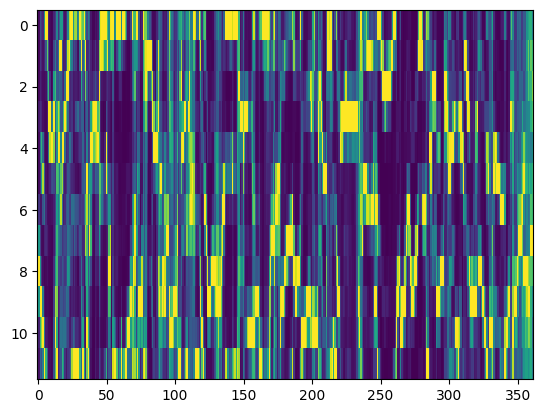

In [15]:
chroma = get_chroma_vector(example_file)
pyplot.imshow(chroma, interpolation='nearest', aspect='auto')
pyplot.show()

In [16]:
print(type(chroma))
print(chroma.shape)
chroma[0]

<class 'numpy.ndarray'>
(12, 362)


array([1.32960409e-01, 3.38223688e-02, 2.24310696e-01, 1.52372882e-01,
       1.06897891e-01, 5.13788581e-01, 1.00000000e+00, 1.00000000e+00,
       9.69329700e-02, 2.66920682e-02, 8.82538129e-03, 1.53171876e-02,
       1.05142727e-01, 1.69561118e-01, 4.52988088e-01, 1.43689290e-01,
       3.05367470e-01, 5.44640601e-01, 5.40287375e-01, 1.18886575e-01,
       5.11737801e-02, 1.23135000e-01, 4.75247562e-01, 9.12922204e-01,
       1.00000000e+00, 1.00000000e+00, 5.39447546e-01, 8.26459944e-01,
       8.52590501e-01, 4.14494276e-01, 5.07122397e-01, 1.00000000e+00,
       8.32523465e-01, 7.47913122e-01, 1.00000000e+00, 5.26253700e-01,
       2.20754176e-01, 3.90659869e-01, 2.96270937e-01, 6.52773976e-02,
       1.25326673e-02, 1.30116269e-02, 5.23288921e-02, 3.33160572e-02,
       6.55093193e-02, 5.34460485e-01, 9.68288362e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.98705685e-01, 7.19982028e-01,
       4.84822482e-01, 9.82096076e-01, 1.00000000e+00, 1.00000000e+00,
      

### Tonal Centroid Features (Tonnetz)

In [18]:
def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = numpy.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

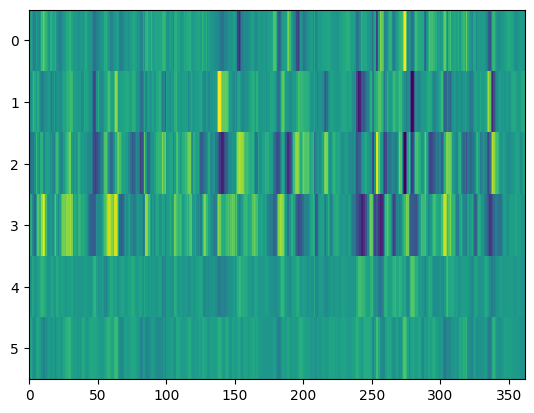

In [19]:
tntz = get_tonnetz(example_file)
pyplot.imshow(tntz , interpolation='nearest', aspect='auto')
pyplot.show()

In [20]:
print(type(tntz))
print(tntz.shape)
tntz[0]

<class 'numpy.ndarray'>
(6, 362)


array([ 6.79794404e-02,  3.11561151e-02, -2.85021684e-02, -8.11964041e-02,
       -8.88119774e-02,  1.56775972e-02, -4.07646893e-02, -5.53049264e-02,
        2.40784762e-02,  1.21096447e-01,  1.96393218e-01,  1.36279041e-01,
        9.40944856e-02,  5.23594467e-02, -5.93060906e-03,  7.31962379e-02,
        8.91070417e-02,  3.94794368e-02,  3.31368715e-02,  7.08345915e-02,
       -1.82019195e-02, -8.79245356e-02, -7.42487411e-02, -7.19004854e-02,
       -3.18415073e-02,  2.20804199e-03,  2.54126439e-02,  4.77204907e-02,
        6.40902345e-02,  8.48972914e-02,  1.03317881e-01,  3.66614549e-02,
       -5.91610715e-04,  3.94997612e-03, -4.41536091e-03, -1.49156452e-02,
       -2.92654173e-02, -1.97336043e-03,  9.13115173e-03, -1.02860378e-02,
        1.95141249e-02,  6.44897585e-02,  8.57915949e-03, -1.66563951e-02,
       -1.44388344e-02, -1.24199551e-02, -6.07658496e-02, -1.42101062e-01,
       -1.39583204e-01, -9.08165466e-02, -5.67734373e-02, -6.48317638e-02,
       -2.02105490e-02, -

## Puting the Features Together

In [22]:
def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = numpy.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = numpy.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = numpy.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # Extracting tonnetz feature
  tntz = get_tonnetz(file_path)
  tntz_mean = tntz.mean(axis=1)
  tntz_min = tntz.min(axis=1)
  tntz_max = tntz.max(axis=1)
  tntz_feature = numpy.concatenate( (tntz_mean, tntz_min, tntz_max) ) 
  
  feature = numpy.concatenate( (chroma_feature, melspectrogram_feature, mfcc_feature, tntz_feature) )
  return feature

In [26]:
features = []
features.append(get_feature(example_file))
print(type(features))
print(features[0].shape)
features[0]

<class 'list'>
(498,)


array([ 3.72185498e-01,  3.11261773e-01,  2.63888478e-01,  3.20078582e-01,
        3.00848395e-01,  2.86504060e-01,  2.88909376e-01,  2.88480371e-01,
        3.29329550e-01,  3.76075447e-01,  3.46049219e-01,  3.52957487e-01,
        1.51415035e-04,  5.48011798e-04,  3.06191994e-03,  1.40637998e-03,
        3.31454823e-04,  2.64236820e-04,  1.03154639e-03,  2.26468896e-03,
        3.13652493e-03,  4.81674587e-03,  2.79332069e-03,  3.11133190e-04,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.39512005e-04,  3.62744730e-04,  1.89500418e-03,  2.83167213e-02,
        5.28791130e-01,  1.09122145e+00,  1.63193536e+00,  2.12429500e+00,
        2.50277972e+00,  3.08852720e+00,  2.57934260e+00,  2.35243058e+00,
        2.51646209e+00,  2.64296246e+00,  3.07796884e+00,  5.40338898e+00,
        8.91880989e+00,  

## Calculating features for the full Dataset

Hay que modificar el codigo de abajo.<br>
En ASR (automatic speech recognition) vamos a tener una red neuronal que tiene que identificar entre 29 clases ('A','B', ....).<br>
Pero creo que el 'label' debe de ser la 'transcripcion'.<br>
Queda de comprender como relacionamos las 'clases' y la 'transcripcion'.<br>
TO DO's:<br>
 - [x] Probar 'Task List' con lenguaje MD(mark down)
 - [ ] Realación entre la 'salida de la red nueronal' y la 'trasncripcion' del audio.
 - [ ] quizás solo hay que decirle cuantas clases quiero (29 clases :letras + espacio)


In [ ]:
directory = 'dataset'
genres = ['reggae','classical','rock']
features = []
labels = []
for genre in genres:
    print("Calculating features for genre : " + genre)
    for file in os.listdir(directory+"/"+genre):
        file_path = directory+"/"+genre+"/"+file

        features.append(get_feature(file_path))
        label = genres.index(genre) # Aquí le decimos que la salida ha de ser tipo 0:reggie, 1:classical,..
        labels.append(label)

## Splitting the Dataset into training, validation and testing parts

INTERESANTE : Divide el datset en 'train', 'val' y 'test'

In [ ]:
permutations = numpy.random.permutation(300)
features = numpy.array(features)[permutations]
labels = numpy.array(labels)[permutations]

features_train = features[0:180]
labels_train = labels[0:180]

features_val = features[180:240]
labels_val = labels[180:240]

features_test = features[240:300]
labels_test = labels[240:300]

## Definig / Training the model

For this model, we will implement using Keras **two regular densely connected neural network layers**, with a rectified linear unit **activation function "relu"**, and **300 hidden units for the first layer** and **200 for second layer**. Then, for the **output layer** we will also implement a **densely connected layer** with the probabilistic distribution **activation function "softmax"**. Then we'll train the model using **64 epochs**:
TO DO's
- [x] No veo la relación entre inputs y fetaures_train. Respuesta **No es necesario**. Solo aparece en **model.fit(...)** Lo que hacemos antes es generar una instancia (loss, optimizers,metrics,) Que se complian en el modelo y cuando se hace model.fit se pasan los inputs y los labels,...
- [ ] Entiendo que en nuestro proyecto, habrá que realizar para cada 'transcripción' un 'array' con las letras {A,B,C,...} que forman dicha transcripcion y definirlas como 'labels'. 

In [ ]:
inputs = keras.Input(shape=(498), name="feature")
x = keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(3, activation="softmax", name="predictions")(x) # En nuestro caso en vez de 3 serán 28 "las letras a,b,c"

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.fit(x=features_train.tolist(),y=labels_train.tolist(),verbose=1,validation_data=(features_val.tolist() , labels_val.tolist()), epochs=64)

## Model Evaluation

In [ ]:
score = model.evaluate(x=features_test.tolist(),y=labels_test.tolist(), verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')